In [110]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns
import scipy.stats as stats

from imblearn.over_sampling import RandomOverSampler

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [111]:
df = pd.read_csv('heart_failure_dataset.csv')

In [112]:
df.shape

(299, 13)

In [113]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

In [114]:
df.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

In [115]:
df.DEATH_EVENT.value_counts()

0    203
1     96
Name: DEATH_EVENT, dtype: int64

In [116]:
df.isnull().sum()

age                         0
anaemia                     0
creatinine_phosphokinase    0
diabetes                    0
ejection_fraction           0
high_blood_pressure         0
platelets                   0
serum_creatinine            0
serum_sodium                0
sex                         0
smoking                     0
time                        0
DEATH_EVENT                 0
dtype: int64

# EDA

<AxesSubplot:xlabel='DEATH_EVENT', ylabel='count'>

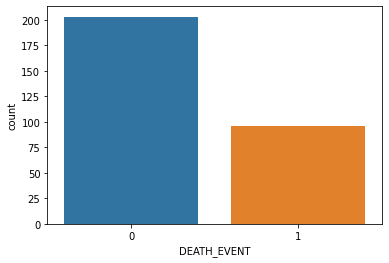

In [117]:
sns.countplot(x=df.DEATH_EVENT)

1    194
0    105
Name: sex, dtype: int64

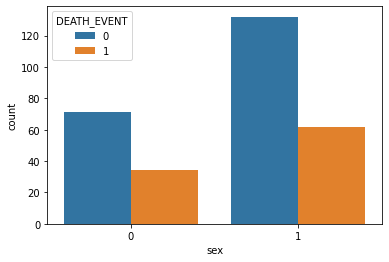

In [118]:
sns.countplot(x=df.sex, hue=df.DEATH_EVENT)
df.sex.value_counts()

<AxesSubplot:xlabel='age', ylabel='Count'>

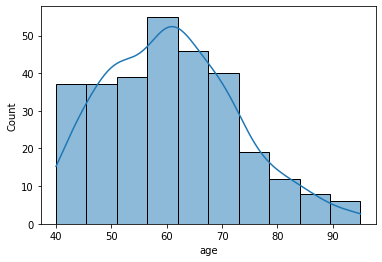

In [119]:
sns.histplot(x=df.age, kde=True)

<AxesSubplot:xlabel='age', ylabel='Count'>

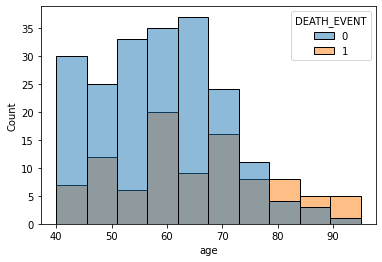

In [120]:
sns.histplot(x=df.age, hue=df.DEATH_EVENT)

<AxesSubplot:xlabel='smoking', ylabel='count'>

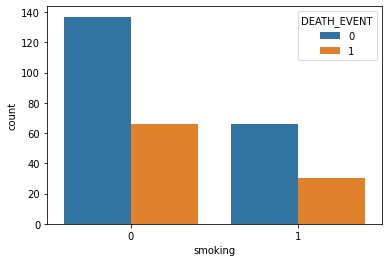

In [121]:
sns.countplot(x=df.smoking, hue=df.DEATH_EVENT)

<AxesSubplot:xlabel='diabetes', ylabel='count'>

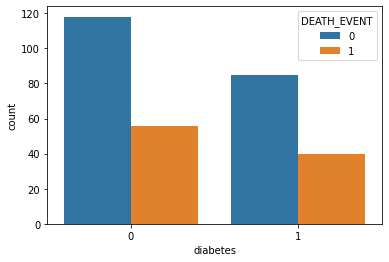

In [122]:
sns.countplot(x=df.diabetes, hue=df.DEATH_EVENT)

In [123]:
df.columns

Index(['age', 'anaemia', 'creatinine_phosphokinase', 'diabetes',
       'ejection_fraction', 'high_blood_pressure', 'platelets',
       'serum_creatinine', 'serum_sodium', 'sex', 'smoking', 'time',
       'DEATH_EVENT'],
      dtype='object')

<AxesSubplot:xlabel='high_blood_pressure', ylabel='count'>

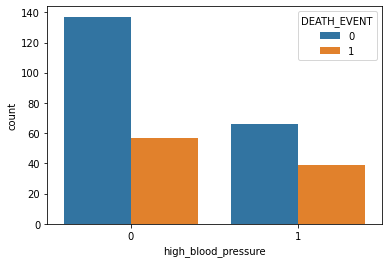

In [124]:
sns.countplot(x=df.high_blood_pressure, hue=df.DEATH_EVENT)

<AxesSubplot:xlabel='ejection_fraction', ylabel='count'>

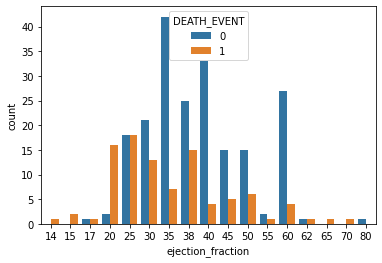

In [125]:
sns.countplot(x=df.ejection_fraction, hue=df.DEATH_EVENT)

<AxesSubplot:xlabel='anaemia', ylabel='count'>

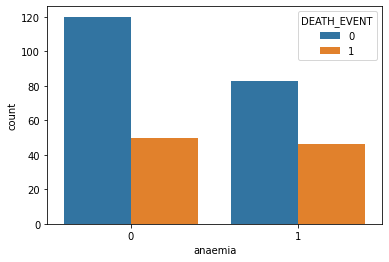

In [126]:
sns.countplot(x=df.anaemia, hue=df.DEATH_EVENT)

<Figure size 6000x6000 with 0 Axes>

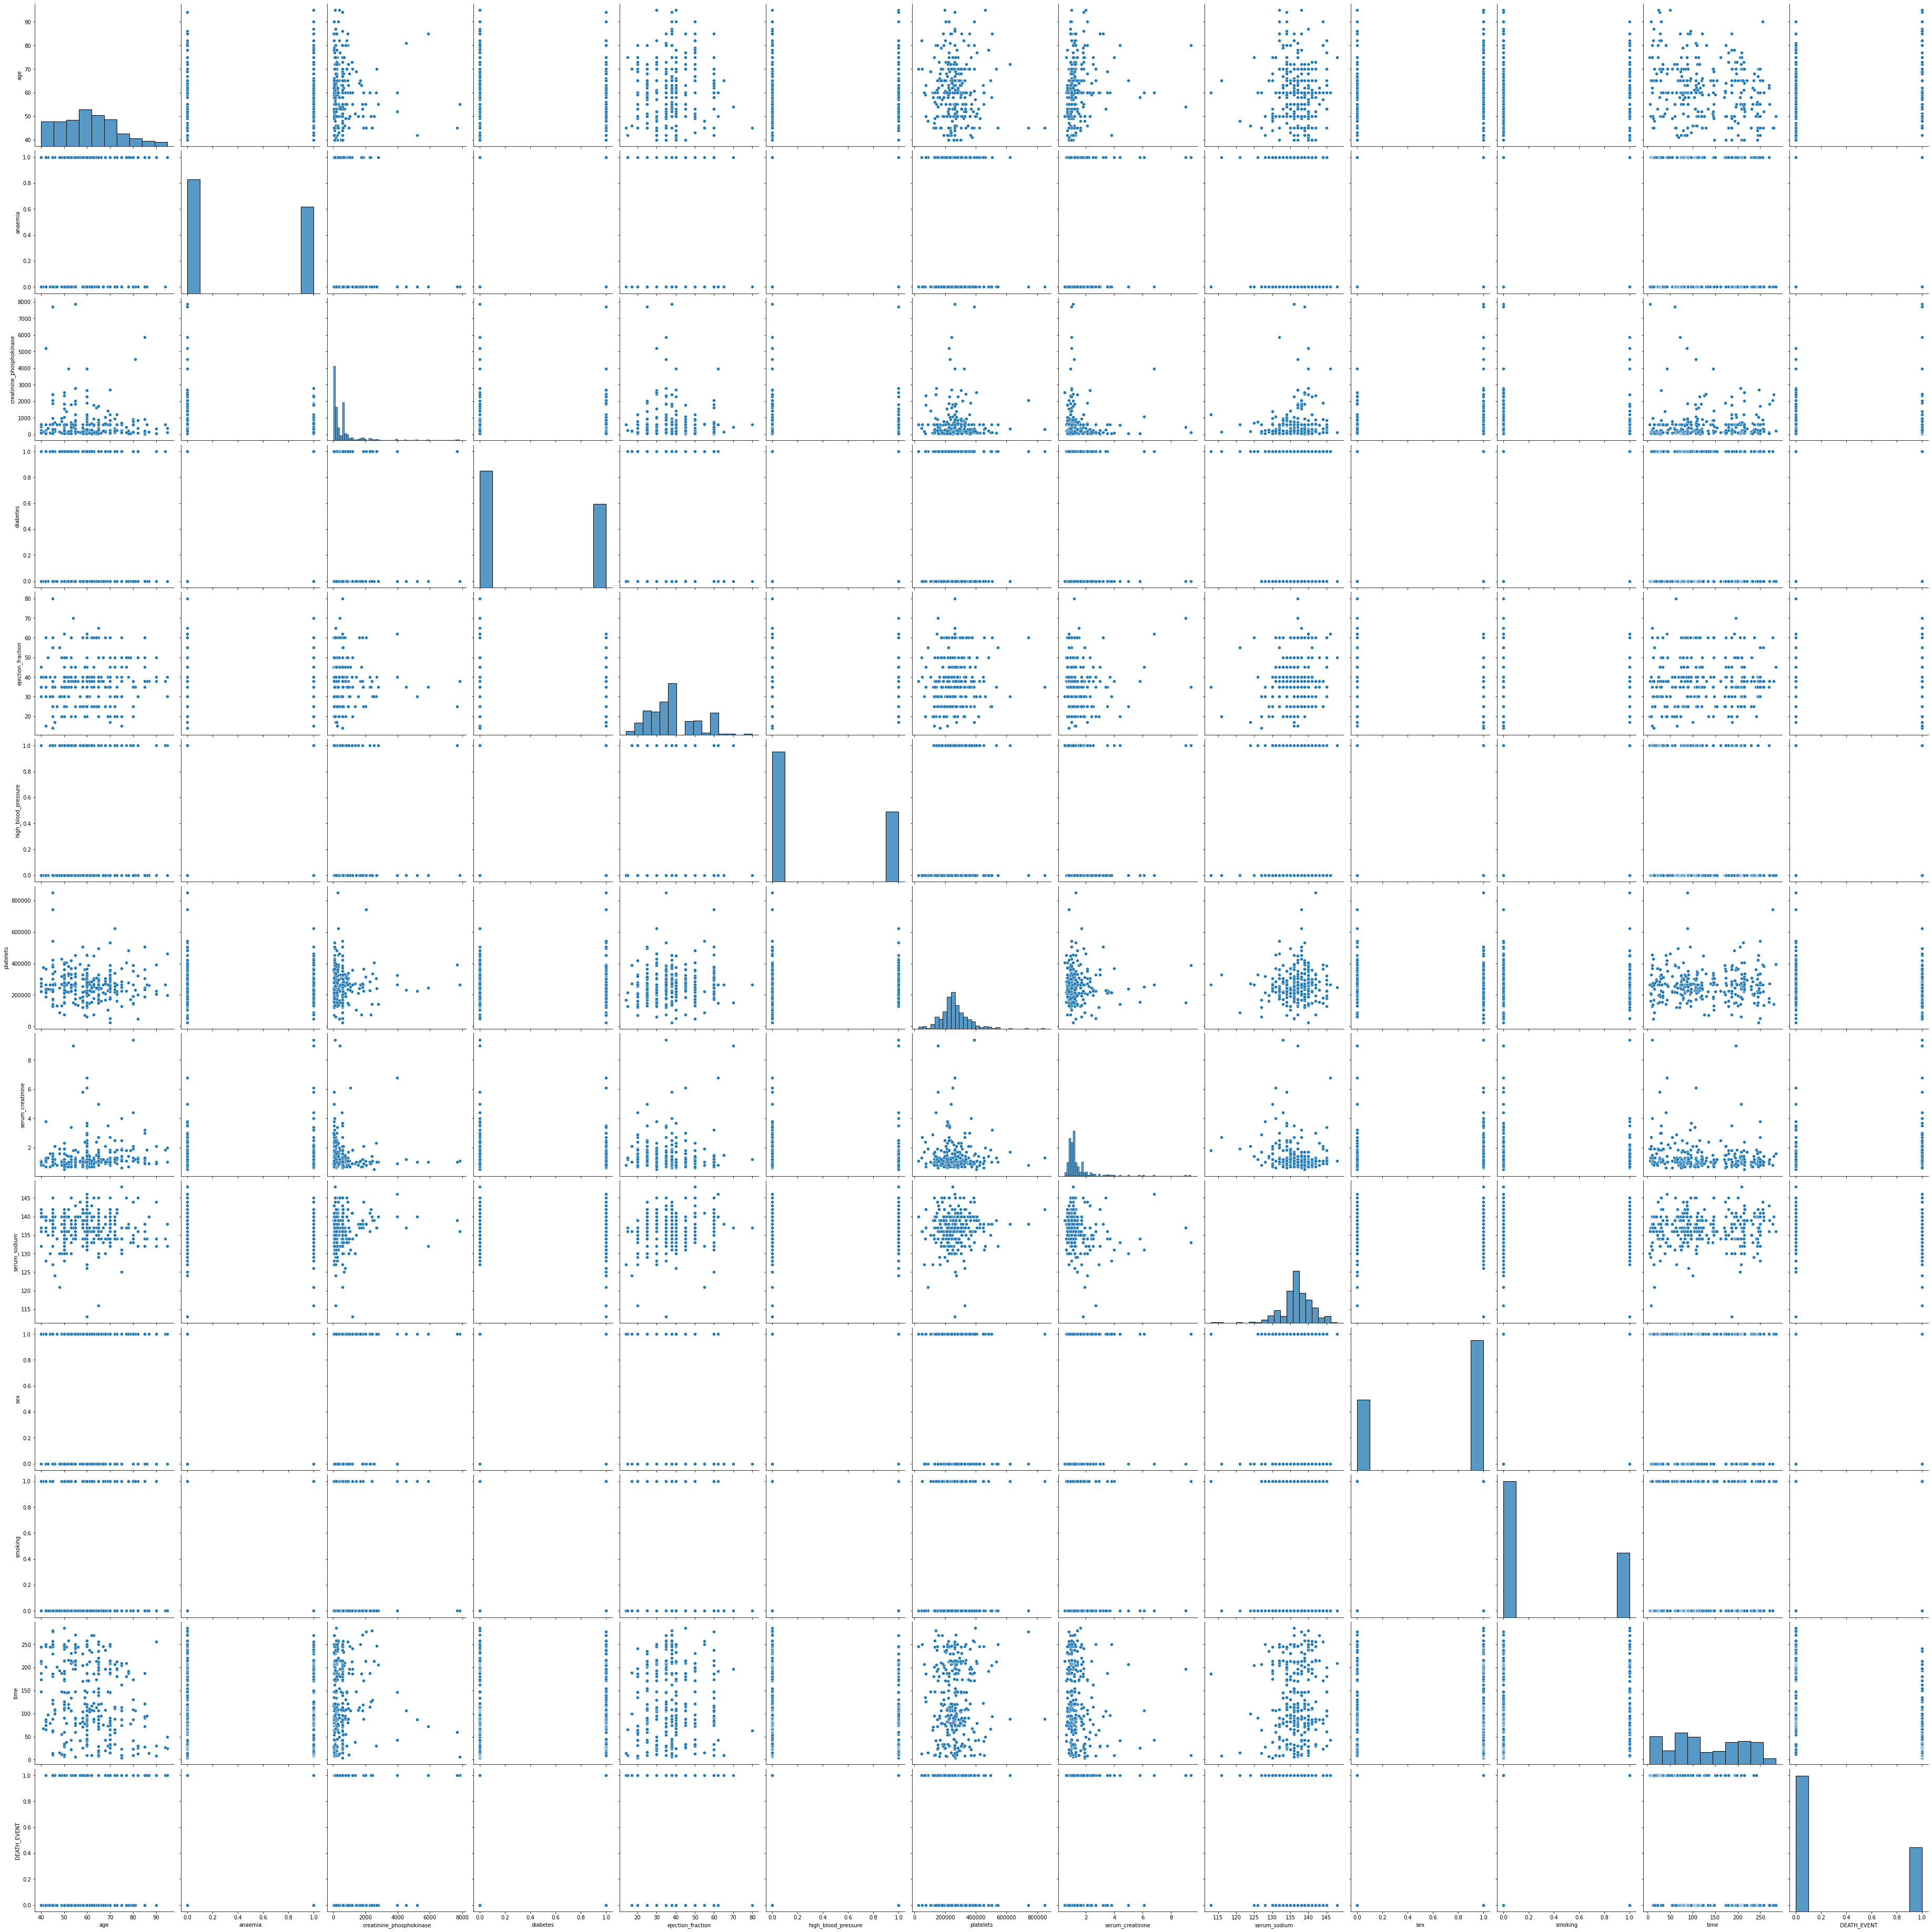

In [127]:
plt.figure(figsize=(20,20), dpi=300)
sns.pairplot(data=df, height=4)

<AxesSubplot:>

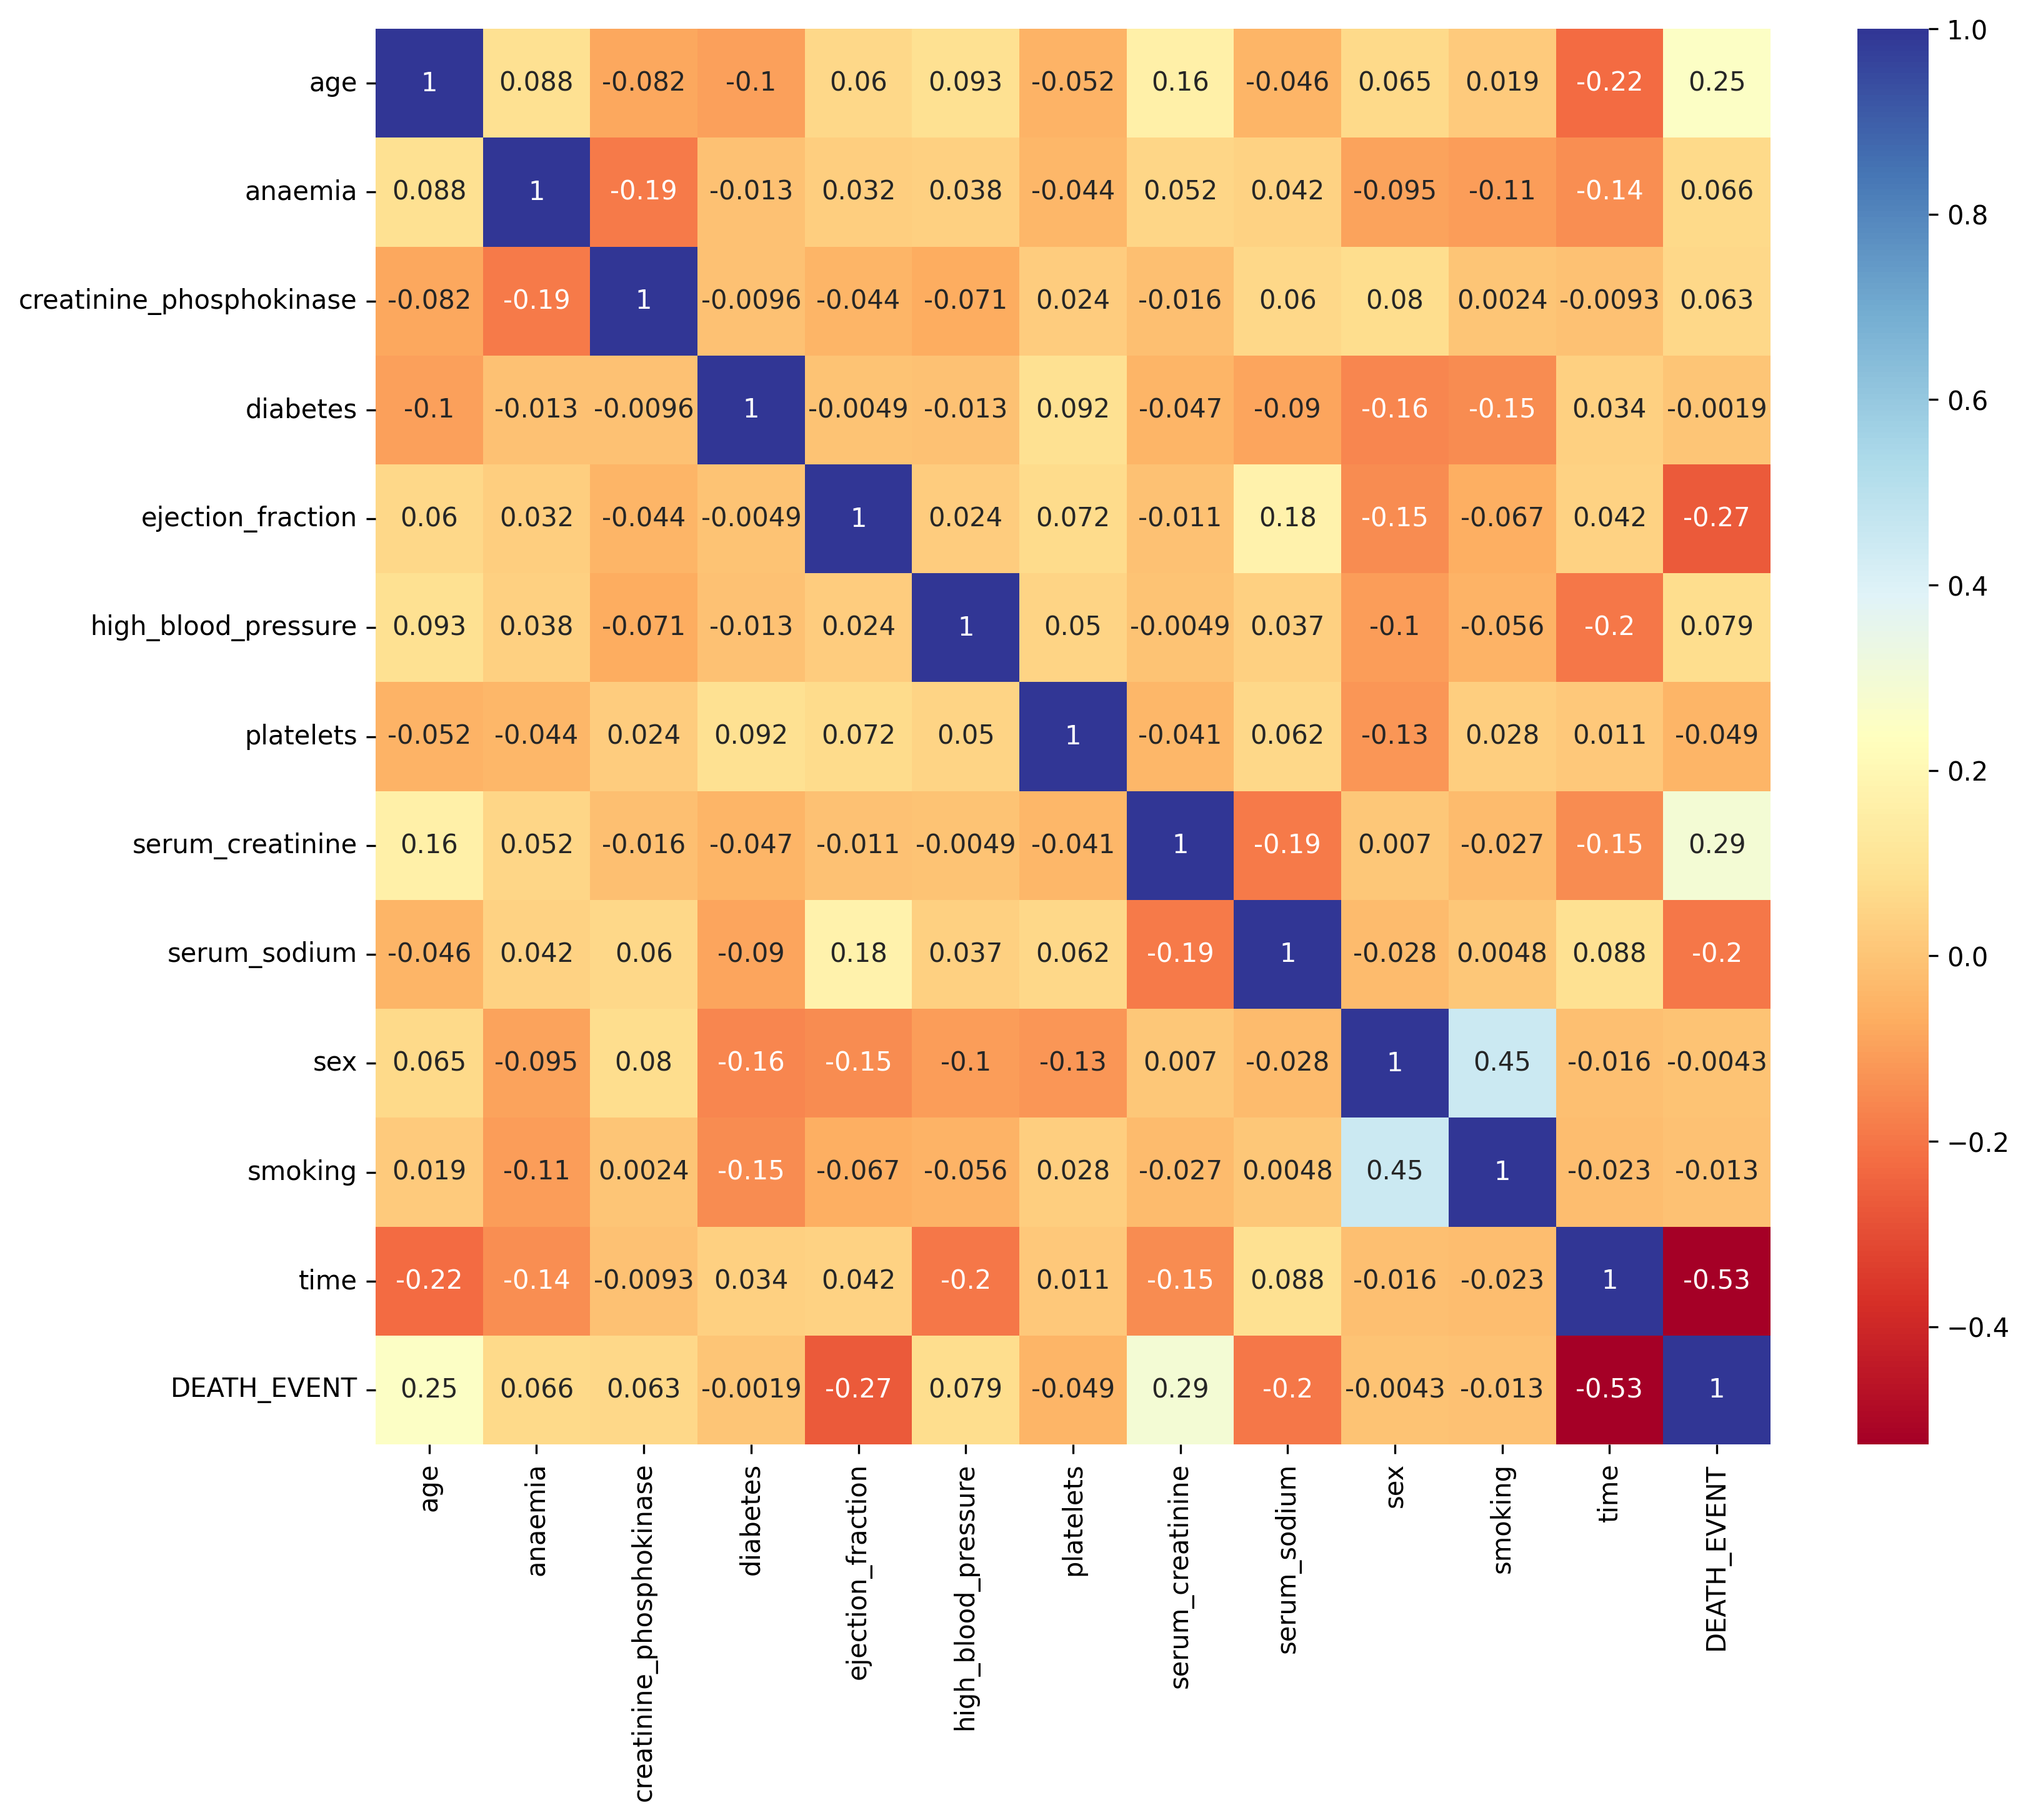

In [128]:
plt.figure(figsize=(12,10), dpi=300)
sns.heatmap(data=df.corr(), cmap=plt.cm.RdYlBu, annot=True)

In [129]:
col = ['', 'age', 'creatinine_phosphokinase',
       'ejection_fraction', 'platelets',
       'serum_creatinine', 'serum_sodium', 'time',
       'DEATH_EVENT']
col 

['',
 'age',
 'creatinine_phosphokinase',
 'ejection_fraction',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'time',
 'DEATH_EVENT']

In [130]:
plt.figure(figsize=(30,30), dpi=300)
for i in range(1,8):
    plt.subplot(4,2,i)
    sns.kdeplot(df[col[i]], shade=True, hue=df.DEATH_EVENT)

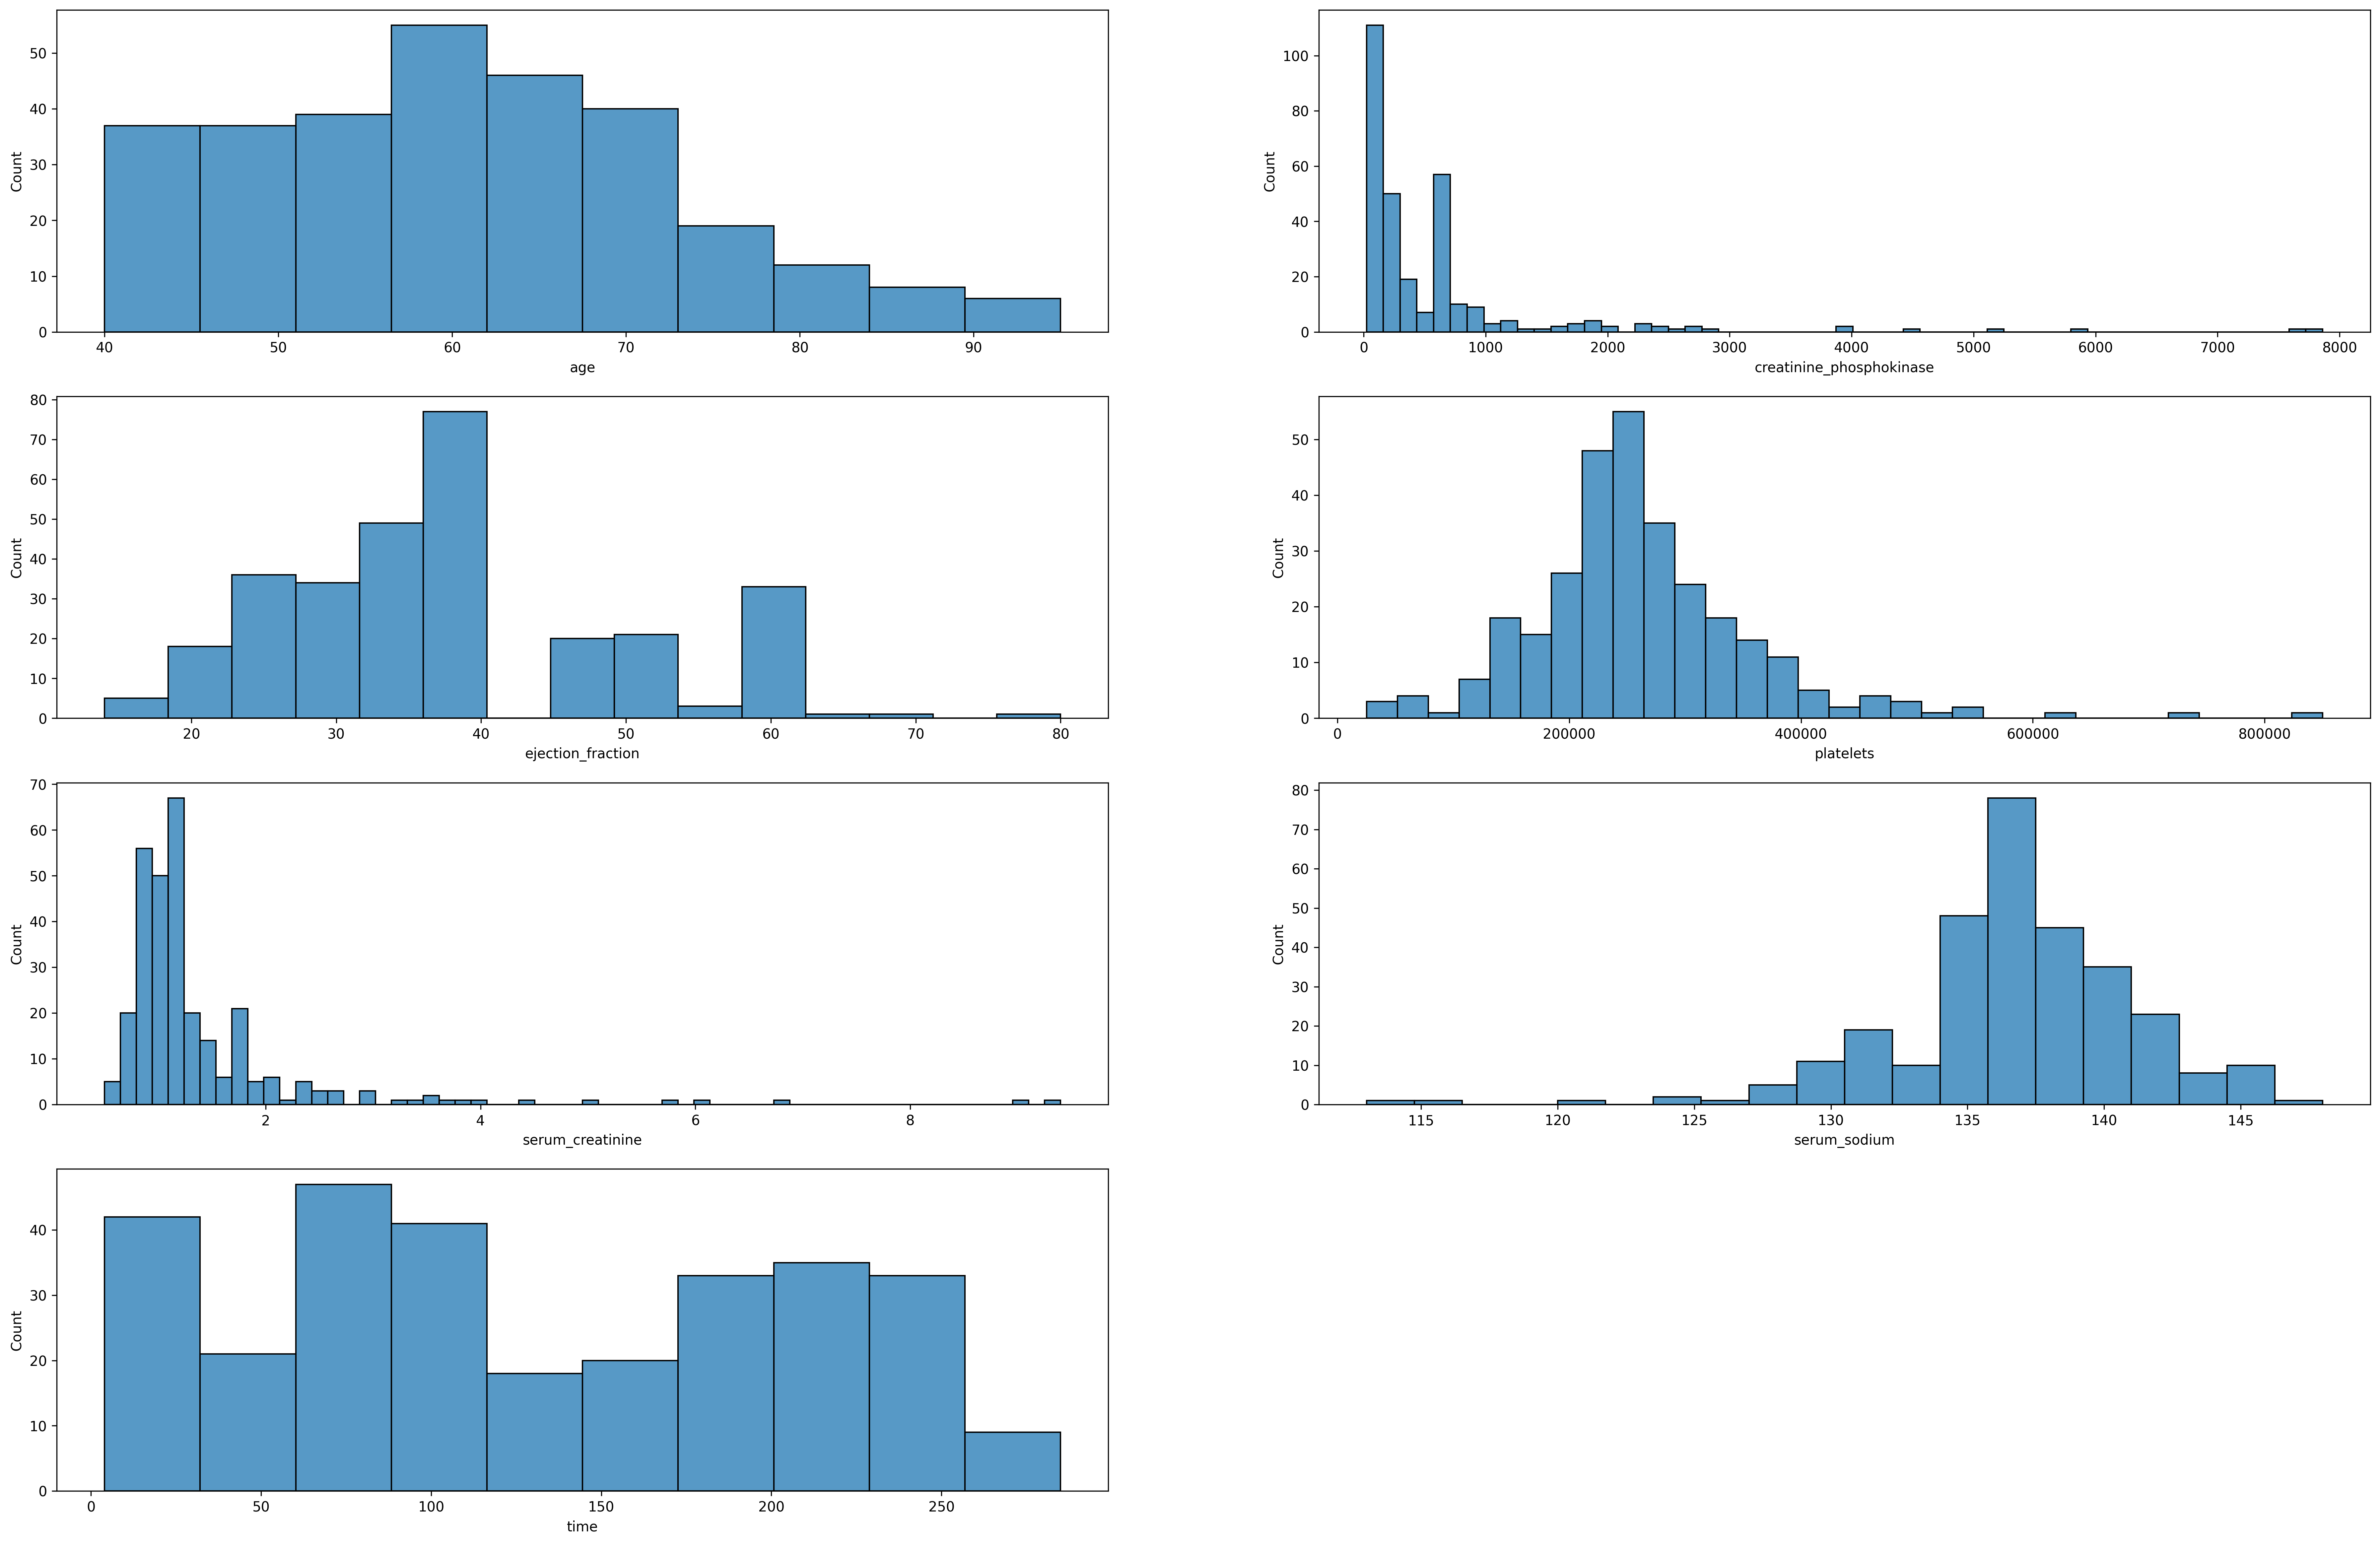

In [131]:
plt.figure(figsize=(30,30), dpi=300)
for i in range(1,8):
    plt.subplot(6,2,i)
    sns.histplot(df[col[i]])

Since I don't know much about health heart problems so I am going to consider the values as outliers.
Maybe they are rare cases but I don't have any domain knowledge of it so I am going to consider them as an outlier

# Handling Null Values

In [132]:
df.isna().values.any()

False

# Handling Outliers

In [133]:
col #Outliers are present in all these 'col' except age and time

['',
 'age',
 'creatinine_phosphokinase',
 'ejection_fraction',
 'platelets',
 'serum_creatinine',
 'serum_sodium',
 'time',
 'DEATH_EVENT']

In [134]:
new_df = df.copy()

In [135]:
new_df.head()

age  anaemia  creatinine_phosphokinase  diabetes  ejection_fraction  \
0  75.0        0                       582         0                 20   
1  55.0        0                      7861         0                 38   
2  65.0        0                       146         0                 20   
3  50.0        1                       111         0                 20   
4  65.0        1                       160         1                 20   

   high_blood_pressure  platelets  serum_creatinine  serum_sodium  sex  \
0                    1  265000.00               1.9           130    1   
1                    0  263358.03               1.1           136    1   
2                    0  162000.00               1.3           129    1   
3                    0  210000.00               1.9           137    1   
4                    0  327000.00               2.7           116    0   

   smoking  time  DEATH_EVENT  
0        0     4            1  
1        0     6            1  
2        1     7            1  
3        0     7            1  
4        0     8            1

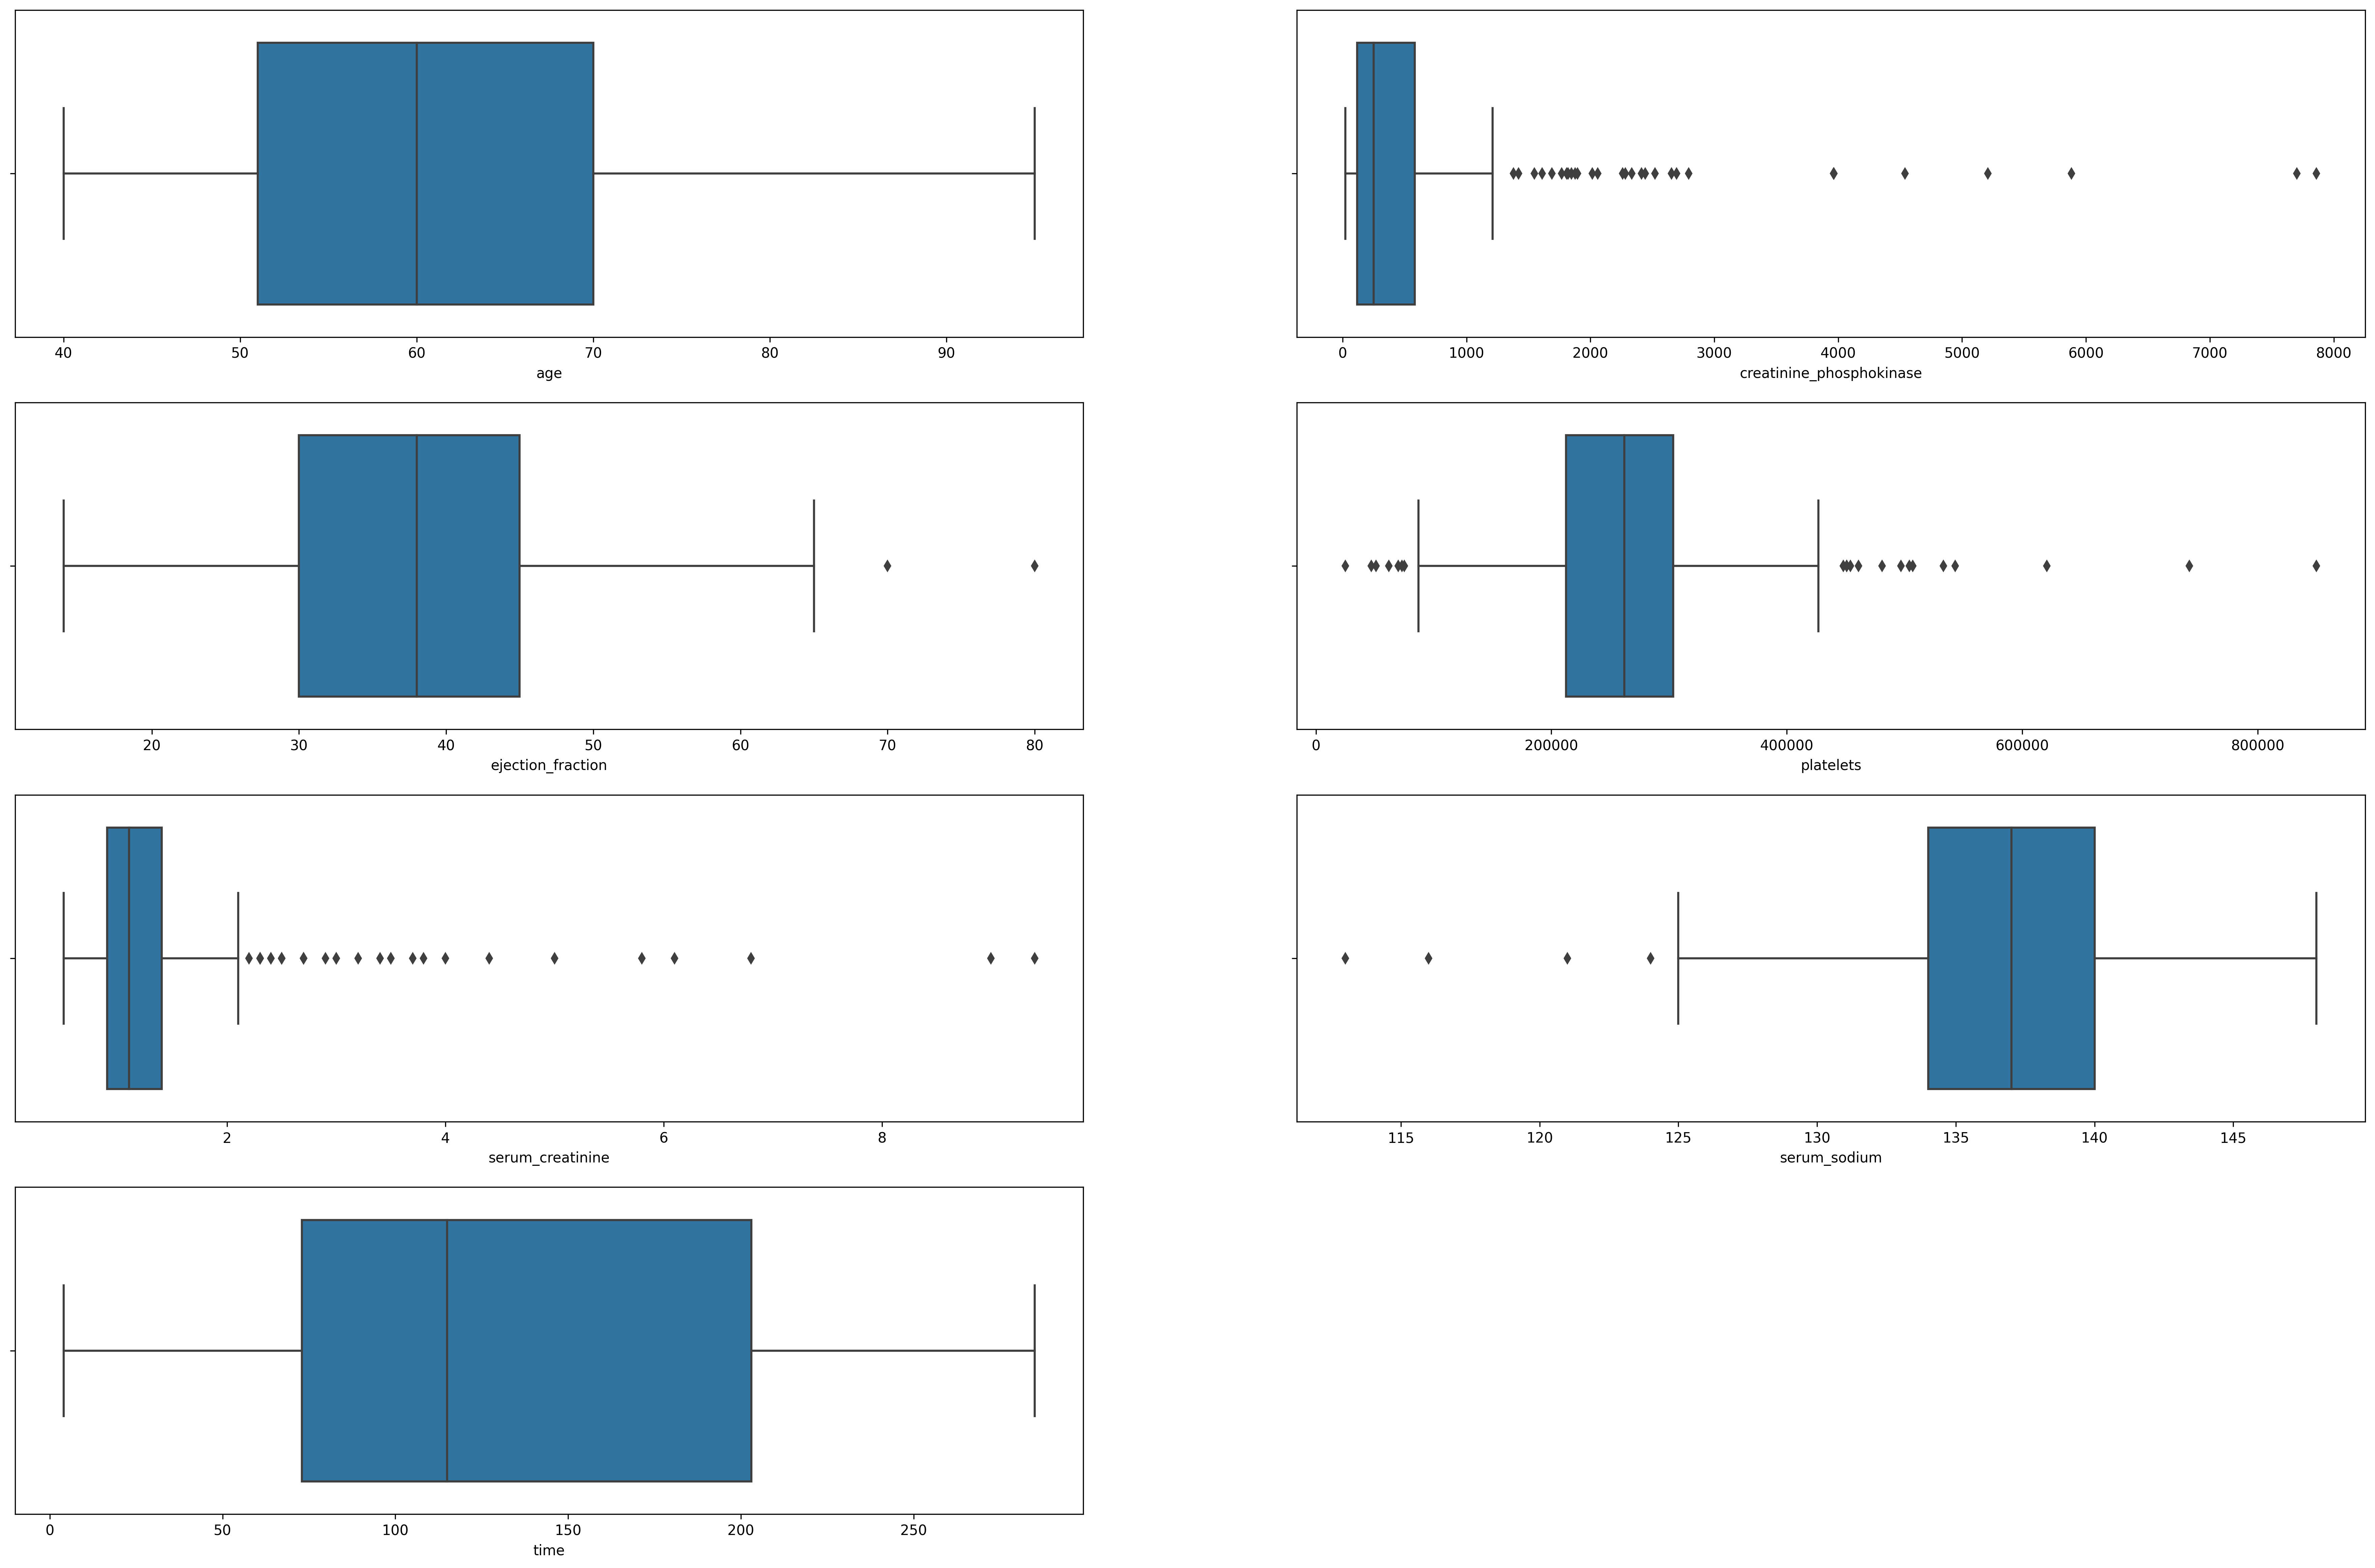

In [136]:
plt.figure(figsize=(30,30), dpi=300)
for i in range(1,8):
    plt.subplot(6,2,i)
    sns.boxplot(df[col[i]])

I am going to use IQR. I have tried z-score technique but I don't feel like to use here so that's why I am going with IQR

In [137]:
quantile_1, quantile_3 = np.quantile(df.creatinine_phosphokinase, [0.25,0.75])
IQR = quantile_3 - quantile_1
lower = quantile_1 - (1.5*IQR)
upper = quantile_3 + (1.5*IQR)
print(lower, upper)
df.loc[df.creatinine_phosphokinase<lower ,'creatinine_phosphokinase']= lower
df.loc[df.creatinine_phosphokinase>upper ,'creatinine_phosphokinase']= upper

-581.75 1280.25


In [138]:
quantile_1, quantile_3 = np.quantile(df.ejection_fraction, [0.25,0.75])
IQR = quantile_3 - quantile_1
lower = quantile_1 - (1.5*IQR)
upper = quantile_3 + (1.5*IQR)
print(lower, upper)
df.loc[df.ejection_fraction<lower ,'ejection_fraction']= lower
df.loc[df.ejection_fraction>upper ,'ejection_fraction']= upper

7.5 67.5


In [139]:
quantile_1, quantile_3 = np.quantile(df.platelets, [0.25,0.75])
IQR = quantile_3 - quantile_1
lower = quantile_1 - (1.5*IQR)
upper = quantile_3 + (1.5*IQR)
print(lower, upper)
df.loc[df.platelets<lower ,'platelets']= lower
df.loc[df.platelets>upper ,'platelets']= upper

76000.0 440000.0


In [140]:
quantile_1, quantile_3 = np.quantile(df.serum_creatinine, [0.25,0.75])
IQR = quantile_3 - quantile_1
lower = quantile_1 - (1.5*IQR)
upper = quantile_3 + (1.5*IQR)
print(lower, upper)
df.loc[df.serum_creatinine<lower ,'serum_creatinine']= lower
df.loc[df.serum_creatinine>upper ,'serum_creatinine']= upper

0.15000000000000024 2.1499999999999995


In [141]:
quantile_1, quantile_3 = np.quantile(df.serum_sodium, [0.25,0.75])
IQR = quantile_3 - quantile_1
lower = quantile_1 - (1.5*IQR)
upper = quantile_3 + (1.5*IQR)
print(lower, upper)
df.loc[df.serum_sodium<lower ,'serum_sodium']= lower
df.loc[df.serum_sodium>upper ,'serum_sodium']= upper

125.0 149.0


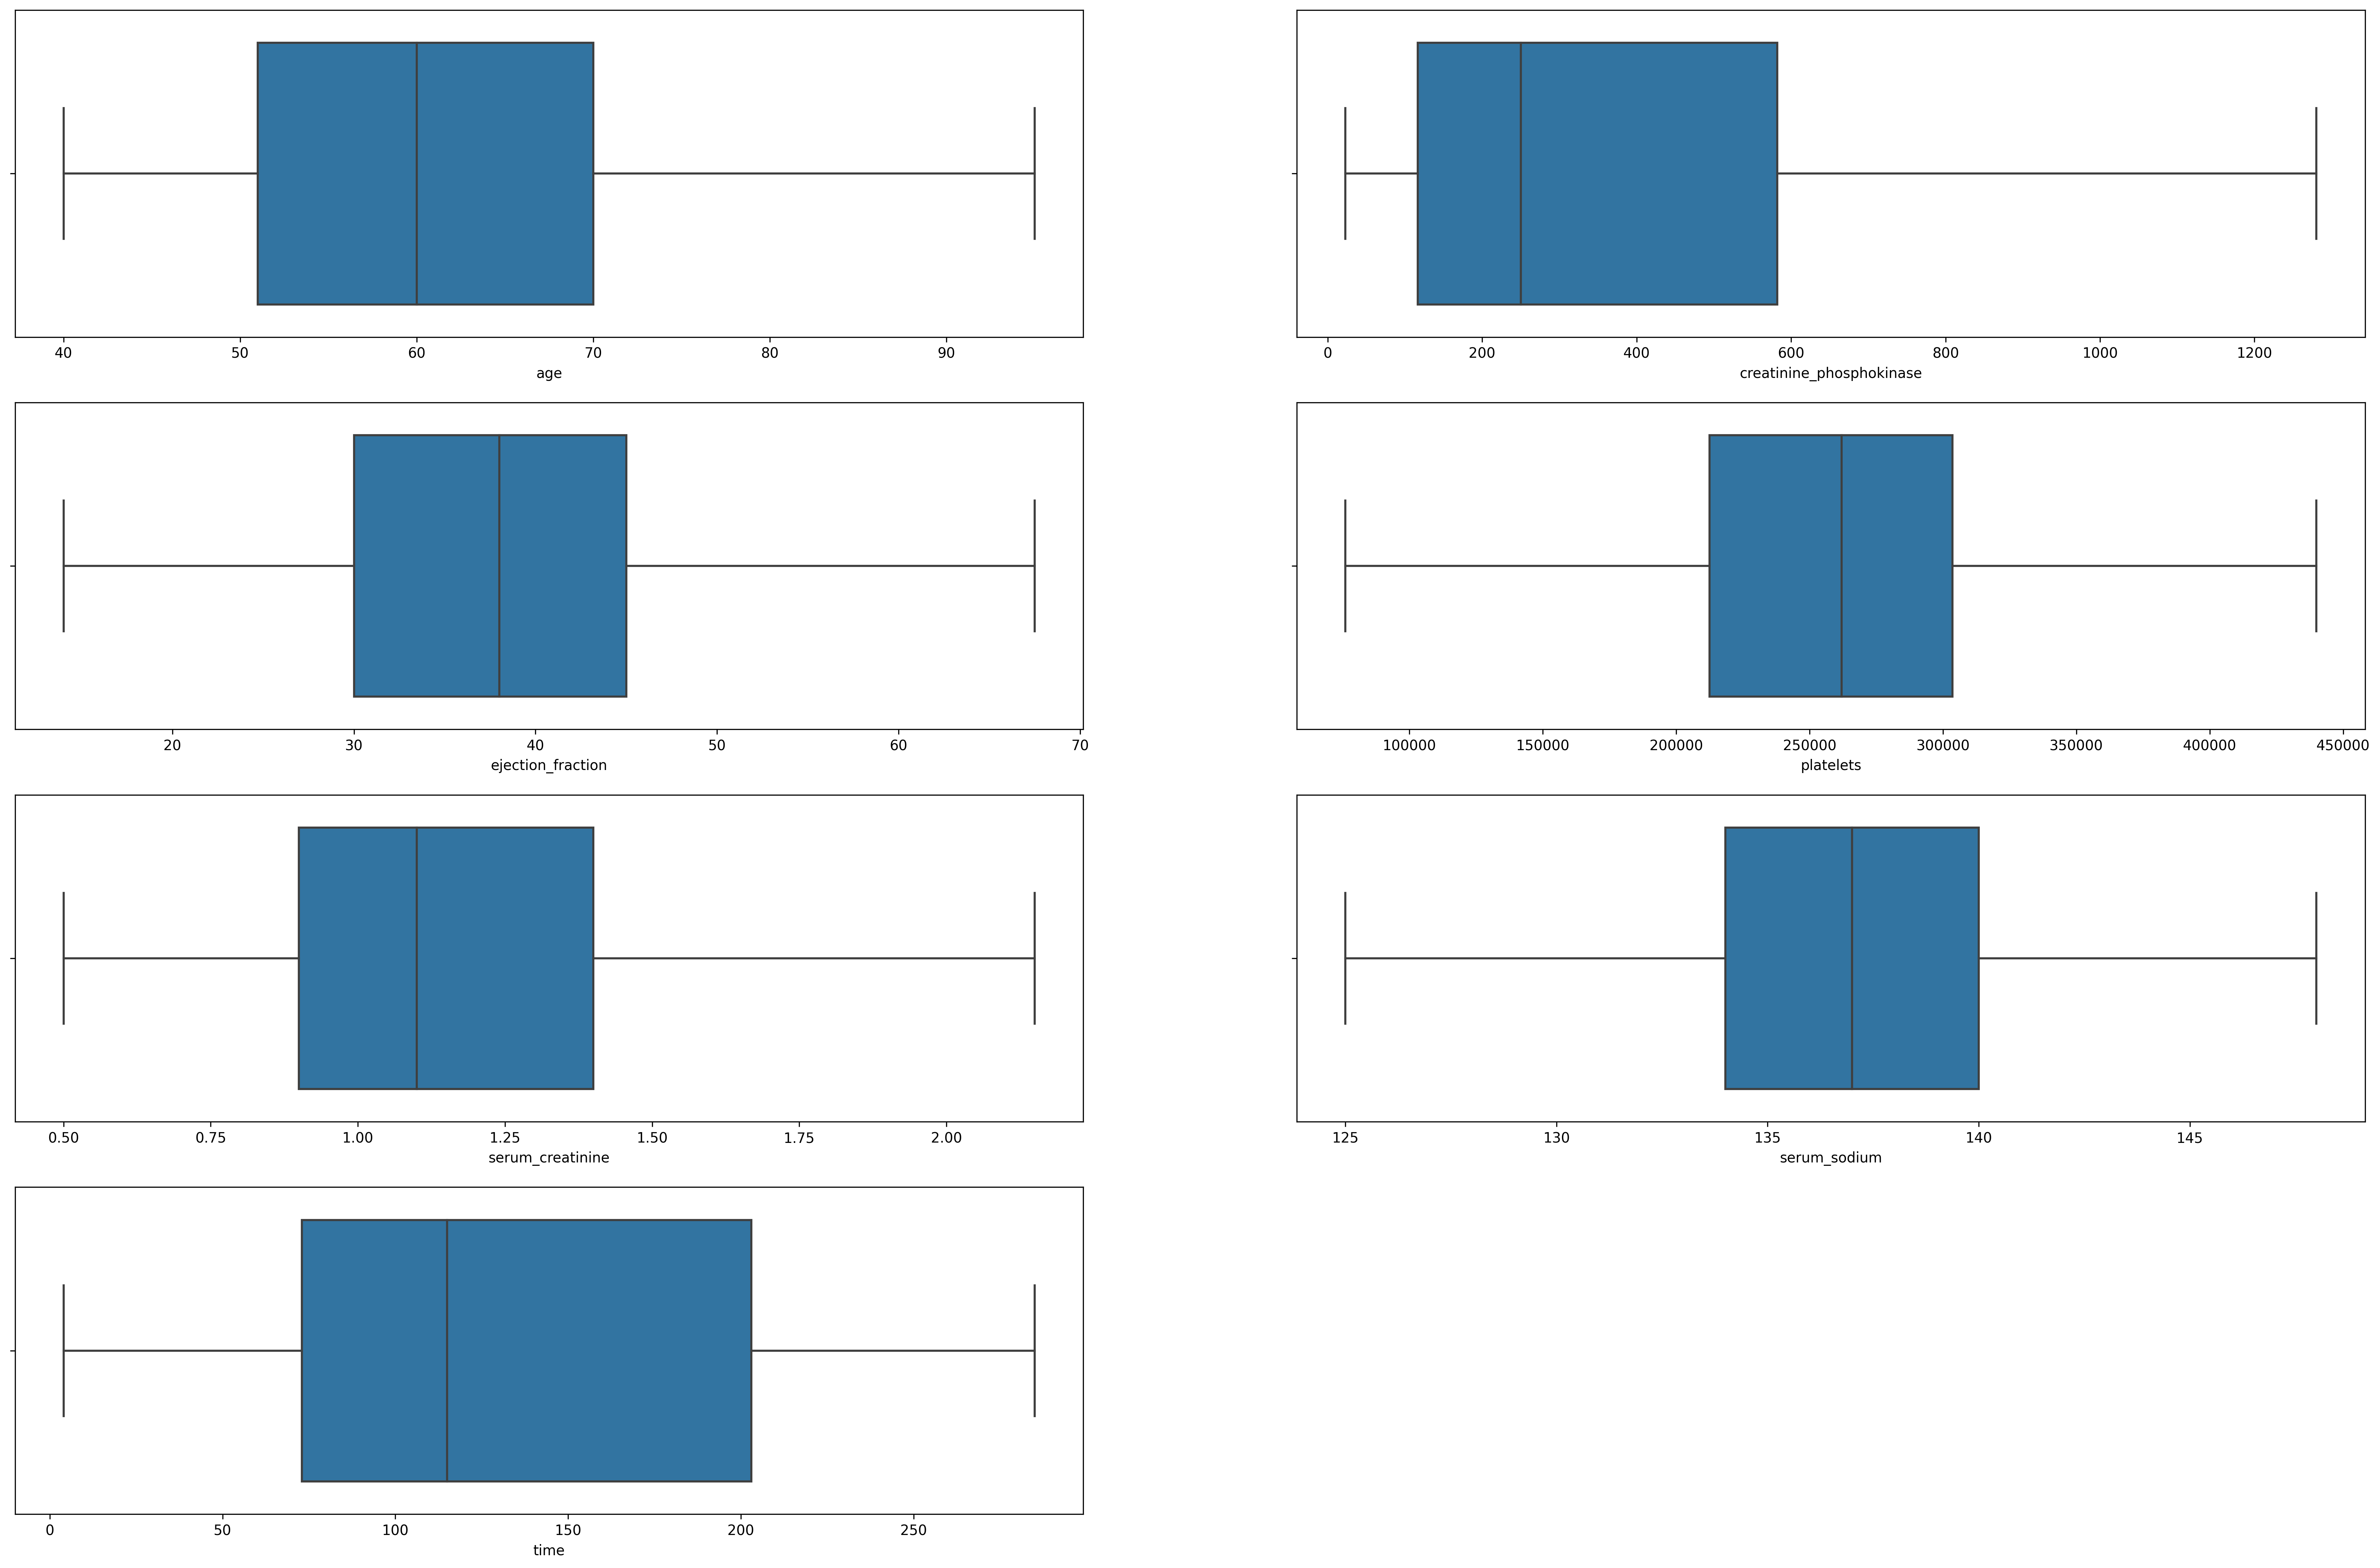

In [142]:
plt.figure(figsize=(30,30), dpi=300)
for i in range(1,8):
    plt.subplot(6,2,i)
    sns.boxplot(df[col[i]])

In [143]:
plt.figure(figsize=(30,30), dpi=300)
for i in range(1,8):
    plt.subplot(4,2,i)
    sns.kdeplot(df[col[i]], shade=True, hue=df.DEATH_EVENT)

# Splitting data

In [144]:
X = df.drop('DEATH_EVENT', axis=1)
y = df.DEATH_EVENT

In [145]:
scaling = StandardScaler()
X_scaled = scaling.fit_transform(X)

In [146]:
X_scaled = pd.DataFrame(data=X_scaled, columns=df.columns[:-1])

In [147]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=10)

In [148]:
ros = RandomOverSampler()

In [149]:
X_train_sample , y_train_sample = ros.fit_resample(X_train, y_train)

# Model Building (Logistic, RandomForest, XGBoost)

In [150]:
logistic = LogisticRegression()

In [151]:
logistic.fit(X_train_sample, y_train_sample)

LogisticRegression()

In [152]:
pred_y = logistic.predict(X_test)

In [153]:
accuracy_score(pred_y, y_test)

0.7777777777777778

In [154]:
print(classification_report(pred_y, y_test))

              precision    recall  f1-score   support

           0       0.79      0.87      0.83        55
           1       0.76      0.63      0.69        35

    accuracy                           0.78        90
   macro avg       0.77      0.75      0.76        90
weighted avg       0.78      0.78      0.77        90



In [155]:
rft = RandomForestClassifier()

In [156]:
rft.fit(X_train_sample, y_train_sample)

RandomForestClassifier()

In [157]:
pred_y_rfc = rft.predict(X_test)

In [220]:
pred_y_rfc

array([1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0,
       1, 1])

In [158]:
accuracy_score(y_true=y_test, y_pred=pred_y_rfc)

0.8333333333333334

In [159]:
print(classification_report(y_test, pred_y_rfc))

              precision    recall  f1-score   support

           0       0.88      0.87      0.88        61
           1       0.73      0.76      0.75        29

    accuracy                           0.83        90
   macro avg       0.81      0.81      0.81        90
weighted avg       0.84      0.83      0.83        90



In [221]:
from xgboost import XGBClassifier

In [222]:
xgb = XGBClassifier()

In [223]:
xgb.fit(X_train_sample, y_train_sample)

[17:08:38] WARNING: /Users/runner/work/xgboost/xgboost/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.


XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.300000012,
              max_delta_step=0, max_depth=6, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=8,
              num_parallel_tree=1, predictor='auto', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, subsample=1,
              tree_method='exact', validate_parameters=1, verbosity=None)

In [224]:
pred = xgb.predict(X_test)

In [225]:
pred 

array([1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1,
       1, 1])

In [226]:
accuracy_score(pred, y_test)

0.8666666666666667

In [227]:
print(confusion_matrix(pred, y_test))

[[55  6]
 [ 6 23]]


In [229]:
print(classification_report(pred, y_test))

              precision    recall  f1-score   support

           0       0.90      0.90      0.90        61
           1       0.79      0.79      0.79        29

    accuracy                           0.87        90
   macro avg       0.85      0.85      0.85        90
weighted avg       0.87      0.87      0.87        90

